In [1]:
from numpy import ndarray,arange
from pandas import DataFrame, read_csv
from typing import Literal
from numpy import array, ndarray
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.pyplot import savefig, show, figure,subplots
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from library.dslabs_functions import    HEIGHT,plot_line_chart,plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN,read_train_test_from_files,plot_evaluation_results,plot_multiline_chart, DELTA_IMPROVE
import os
import random
import numpy as np

`Train and Test Files`

In [2]:
#define seed in order to obtain the same results 
SEED = 23
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)

In [3]:
train_filename = "models_evaluation/895_records_train_oversampled.xlsx"
test_filename = "models_evaluation/895_records_test.xlsx"
target ="Dissolution"

In [4]:
trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train_filename, test_filename, target)

`Define the Evaluation Metric for all Models`

In [5]:
# accuracy
# precision
# f1
# auc
# recall

eval_metric = "Accuracy"

`Naive-Bayes Models`

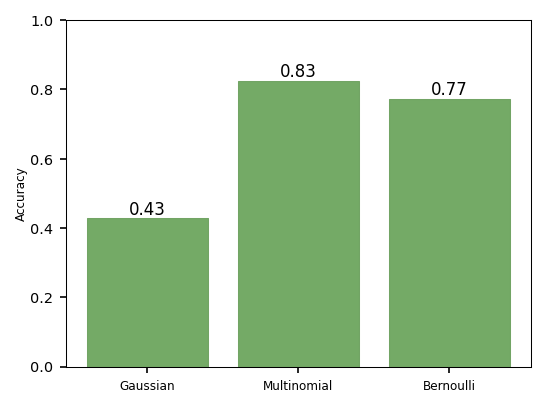

In [6]:
from numpy import array, ndarray
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.pyplot import figure, savefig, show, gca
from library.dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart

def naive_Bayes_study(
    trnX: ndarray,
    trnY: array,
    tstX: ndarray,
    tstY: array,
    metric: str = "Accuracy",
    save_path: str = None  
) -> tuple:
    estimators: dict = {
        "Gaussian": GaussianNB(),
        "Multinomial": MultinomialNB(),
        "Bernoulli": BernoulliNB(),
    }

    xvalues: list = []
    yvalues: list = []
    best_model = None
    best_params: dict = {"name": "", "metric": metric, "params": ()}
    best_performance = 0

    for clf in estimators:
        xvalues.append(clf)
        estimators[clf].fit(trnX, trnY)
        prdY: array = estimators[clf].predict(tstX)
        eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
        yvalues.append(eval)

        if eval - best_performance > DELTA_IMPROVE:
            best_performance = eval
            best_params["name"] = clf
            best_params[metric] = eval
            best_model = estimators[clf]

    plot_bar_chart(
        xvalues,
        yvalues,
        title="",
        ylabel=metric,
        percentage=True,
    )

    ax = gca()
    ax.grid(False)  

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)   
        spine.set_color("black")   

 
    ax.tick_params(direction="out")


    if save_path:
        savefig(save_path, dpi=300, bbox_inches="tight")

    return best_model, best_params


figure()
best_model, params = naive_Bayes_study(
    trnX, trnY, tstX, tstY, eval_metric,
    save_path="naive_bayes_result.png"
)
show()


<Figure size 600x450 with 0 Axes>

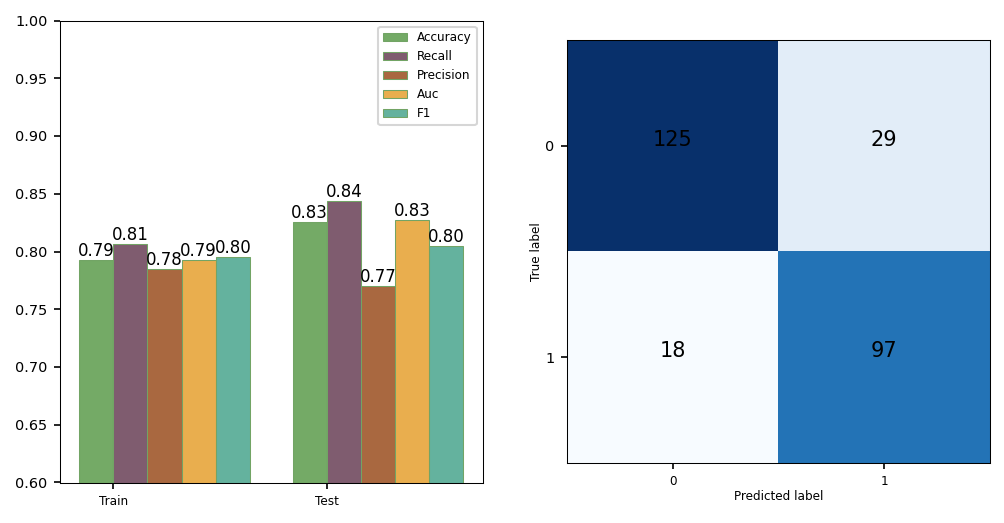

In [7]:
from numpy import array
from matplotlib.pyplot import figure, gca, show, savefig
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from library.dslabs_functions import plot_evaluation_results


prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)


figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)


fig = gca().figure
for ax in fig.axes:
    
    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)
        spine.set_color("black")

    
    if ax.images:
        for im in ax.images:
            im.set_cmap("Blues")
        ax.set_title("")   
    else:
        
        ax.set_ylim(0.6, 1.00)

    
    for text in ax.texts:
        text.set_color("black")

    
    ax.tick_params(direction="out")


fig.suptitle("")


savefig("avaliacao_modelo_NB.png", dpi=300, bbox_inches="tight")

show()


In [ ]:
def make_eval_title(params: dict) -> str:

    name = params.get("name", "MODEL")
    metric = params.get("metric", "metric")
    score = params.get(metric)  
    params_tuple = params.get("params", ())

    parts = [f"Best model: {name}"]
    if params_tuple:
        parts.append(f"params={params_tuple}")
    if score is not None:
        parts.append(f"{metric}={score:.4f}")
    return " | ".join(parts)



title = make_eval_title(params)
print(title)   


Best model: Multinomial | Accuracy=0.8253


`KNN Models`

KNN manhattan k=1
KNN manhattan k=3
KNN manhattan k=5
KNN manhattan k=7
KNN manhattan k=9
KNN manhattan k=11
KNN manhattan k=13
KNN manhattan k=15
KNN manhattan k=17
KNN manhattan k=19
KNN manhattan k=21
KNN manhattan k=23
KNN manhattan k=25
KNN euclidean k=1
KNN euclidean k=3
KNN euclidean k=5
KNN euclidean k=7
KNN euclidean k=9
KNN euclidean k=11
KNN euclidean k=13
KNN euclidean k=15
KNN euclidean k=17
KNN euclidean k=19
KNN euclidean k=21
KNN euclidean k=23
KNN euclidean k=25
KNN chebyshev k=1
KNN chebyshev k=3
KNN chebyshev k=5
KNN chebyshev k=7
KNN chebyshev k=9
KNN chebyshev k=11
KNN chebyshev k=13
KNN chebyshev k=15
KNN chebyshev k=17
KNN chebyshev k=19
KNN chebyshev k=21
KNN chebyshev k=23
KNN chebyshev k=25
KNN best with k=1 and euclidean


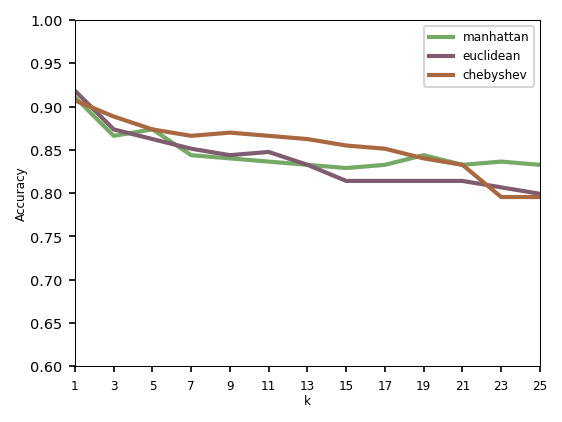

In [9]:
from numpy import array, ndarray
from matplotlib.pyplot import figure, gca, show, savefig
from sklearn.neighbors import KNeighborsClassifier
from typing import Literal
from library.dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_multiline_chart, read_train_test_from_files

def knn_study(
    trnX: ndarray,
    trnY: array,
    tstX: ndarray,
    tstY: array,
    k_max: int = 19,
    lag: int = 2,
    metric: str = 'Accuracy'
) -> tuple[KNeighborsClassifier | None, dict]:
    dist: list[Literal['manhattan', 'euclidean', 'chebyshev']] = ['manhattan', 'euclidean', 'chebyshev']
    kvalues: list[int] = [i for i in range(1, k_max + 1, lag)]

    best_model: KNeighborsClassifier | None = None
    best_params: dict = {'name': 'KNN', 'metric': metric, 'params': ()}
    best_performance: float = 0.0

    values: dict[str, list] = {}
    for d in dist:
        y_tst_values: list = []
        for k in kvalues:
            clf = KNeighborsClassifier(n_neighbors=k, metric=d)
            clf.fit(trnX, trnY)
            prdY: array = clf.predict(tstX)
            eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
            y_tst_values.append(eval)
            if eval - best_performance > DELTA_IMPROVE:
                best_performance = eval
                best_params['params'] = (k, d)
                best_model = clf
            print(f'KNN {d} k={k}')
        values[d] = y_tst_values

    print(f"KNN best with k={best_params['params'][0]} and {best_params['params'][1]}")

    plot_multiline_chart(kvalues, values, xlabel='k', ylabel=metric, percentage=True)

    
    ax = gca()
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)
        spine.set_color("black")
    ax.set_ylim(bottom=0.6)  

    
    ax.tick_params(direction="out")

    return best_model, best_params



trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train_filename, test_filename, target)

figure()
best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=eval_metric)


savefig("knn_study.png", dpi=300, bbox_inches="tight") 

show()


<Figure size 600x450 with 0 Axes>

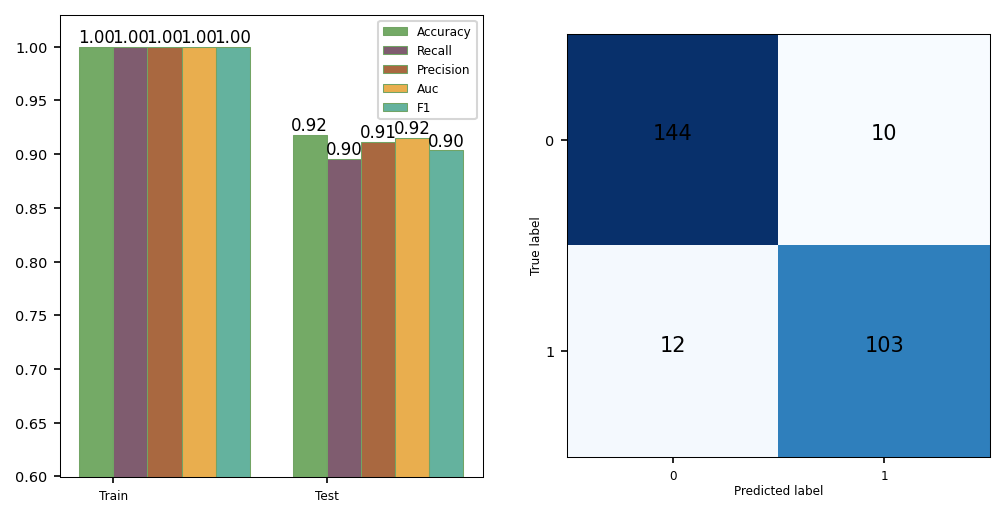

In [10]:
from matplotlib.pyplot import figure, gca, show, savefig
from numpy import array


prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)


figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)

fig = gca().figure
for ax in fig.axes:
    ax.grid(False)

    
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(0.5)

   
    if ax.images:
        for im in ax.images:
            im.set_cmap('Blues')
        ax.set_title("")

    
    for text in ax.texts:
        text.set_color('black')

    
    if not ax.images:
        ax.set_ylim(0.6, 1.03)

  
    ax.tick_params(direction="out")


fig.suptitle("")


savefig("evaluation_results_y06.png", dpi=300, bbox_inches="tight")

show()


In [ ]:
def make_eval_title(params: dict) -> str:

    name = params.get("name", "MODEL")
    metric = params.get("metric", "metric")
    score = params.get(metric)  
    params_tuple = params.get("params", ())

    parts = [f"Best model: {name}"]
    if params_tuple:
        parts.append(f"params={params_tuple}")
    if score is not None:
        parts.append(f"{metric}={score:.4f}")
    return " | ".join(parts)



title = make_eval_title(params)
print(title)   


Best model: KNN | params=(1, 'euclidean')


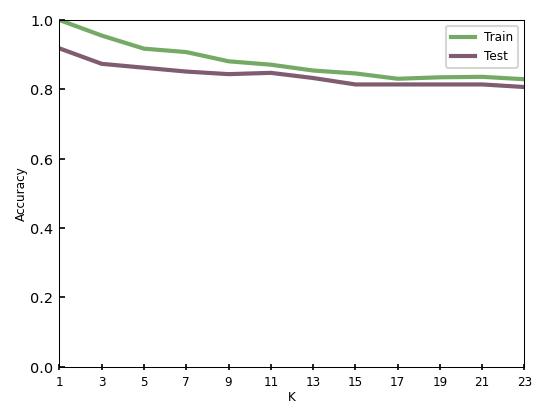

In [ ]:
from matplotlib.pyplot import figure, gca, show, savefig
from numpy import array
from typing import Literal
from sklearn.neighbors import KNeighborsClassifier


distance: Literal["manhattan", "euclidean", "chebyshev"]
kd = params.get("params", None)

if isinstance(kd, tuple) and len(kd) == 2:
    _, distance = kd
else:
    
    try:
        distance = best_model.get_params().get("metric", "manhattan")
    except Exception:
        distance = "manhattan"

K_MAX = 25
kvalues: list[int] = [i for i in range(1, K_MAX, 2)]
y_tst_values: list = []
y_trn_values: list = []
acc_metric: str = "Accuracy"

for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title="",            
    xlabel="K",
    ylabel=str(eval_metric),
    percentage=True,
)

ax = gca()
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_color("black")

savefig("knn_overfitting.png", dpi=300, bbox_inches="tight")
show()


`Decision Trees Models`

Train#=714 Test#=269
Labels=[0, 1]
DT best with gini and depth=12


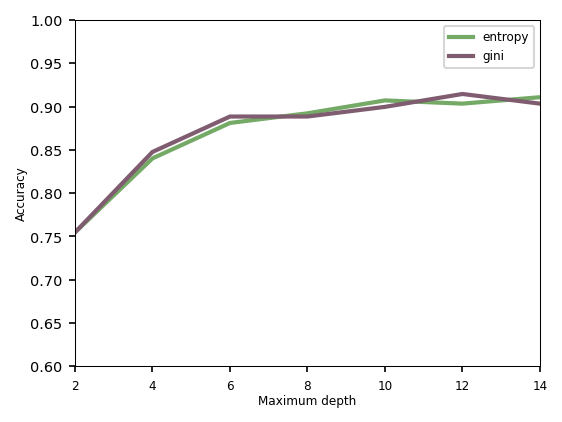

In [13]:
from typing import Literal
from numpy import array, ndarray
from matplotlib.pyplot import figure, savefig, show, gca
from sklearn.tree import DecisionTreeClassifier
from library.dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, read_train_test_from_files
from library.dslabs_functions import plot_evaluation_results, plot_multiline_chart


def trees_study(
    trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, d_max: int = 10, lag: int = 2, metric='accuracy'
) -> tuple:
    criteria: list[Literal['entropy', 'gini']] = ['entropy', 'gini']
    depths: list[int] = [i for i in range(2, d_max + 1, lag)]

    best_model: DecisionTreeClassifier | None = None
    best_params: dict = {'name': 'DT', 'metric': metric, 'params': ()}
    best_performance: float = 0.0

    values: dict = {}
    for c in criteria:
        y_tst_values: list[float] = []
        for d in depths:
            clf = DecisionTreeClassifier(max_depth=d, criterion=c, min_impurity_decrease=0, random_state=SEED)
            clf.fit(trnX, trnY)
            prdY: array = clf.predict(tstX)
            eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
            y_tst_values.append(eval)
            if eval - best_performance > DELTA_IMPROVE:
                best_performance = eval
                best_params['params'] = (c, d)
                best_model = clf
        values[c] = y_tst_values

    print(f"DT best with {best_params['params'][0]} and depth={best_params['params'][1]}")

  
    plot_multiline_chart(depths, values, title="", xlabel='Maximum depth', ylabel=metric, percentage=True)
    
    ax = gca()
    ax.grid(False)  
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)
        spine.set_color("black")
    ax.set_ylim(bottom=0.6, top=1.0)  

   
    ax.tick_params(direction="out")

    return best_model, best_params


trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train_filename, test_filename, target)
print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')
file_tag = "Dissolve"

figure()
best_model, params = trees_study(trnX, trnY, tstX, tstY, d_max=15, metric=eval_metric)

savefig(f'images/criterion_dt_study.png', dpi=300, bbox_inches="tight")
show()


<Figure size 600x450 with 0 Axes>

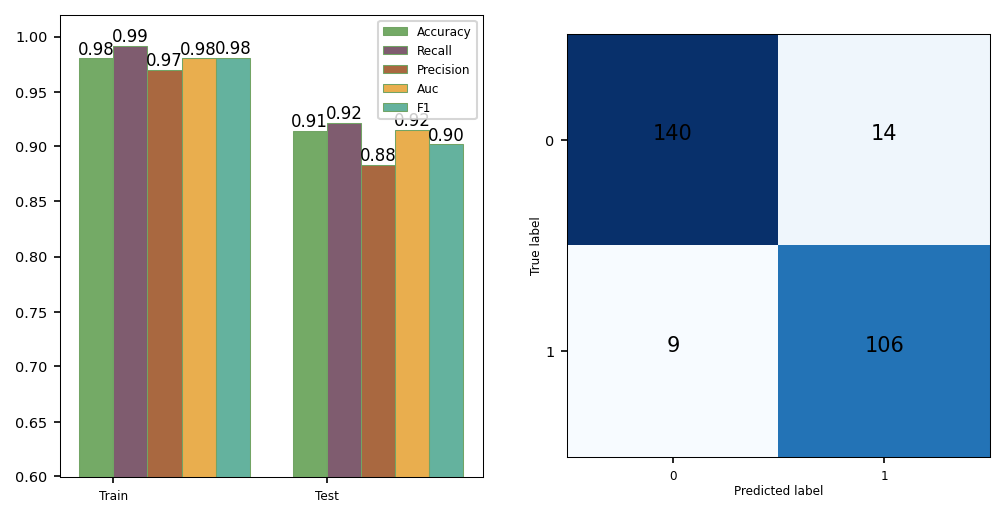

In [14]:
from numpy import array
from matplotlib.pyplot import figure, gca, show, savefig
from library.dslabs_functions import plot_evaluation_results


prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)


figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)

fig = gca().figure
for ax in fig.axes:
    ax.grid(False)        
    ax.set_title("")      
    if ax.images:
       
        for im in ax.images:
            im.set_cmap("Blues")   
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color("black")
            spine.set_linewidth(0.5)  
    else:
        
        ax.set_ylim(0.6, 1.02)  
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color("black")
            spine.set_linewidth(0.5)

    
    ax.tick_params(direction="out")

    
    for text in ax.texts:
        text.set_color("black")


fig.suptitle("")


savefig("evaluation_results_dt.png", dpi=300, bbox_inches="tight")

show()


In [15]:
def make_eval_title(params: dict) -> str:

    name = params.get("name", "MODEL")
    metric = params.get("metric", "metric")
    score = params.get(metric)  
    params_tuple = params.get("params", ())

    parts = [f"Best model: {name}"]
    if params_tuple:
        parts.append(f"params={params_tuple}")
    if score is not None:
        parts.append(f"{metric}={score:.4f}")
    return " | ".join(parts)


title = make_eval_title(params)
print(title)   


Best model: DT | params=('gini', 12)


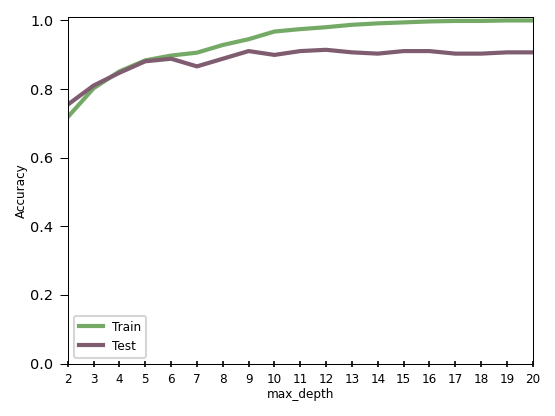

In [16]:
from matplotlib.pyplot import figure, gca, show, close
from numpy import array
from sklearn.tree import DecisionTreeClassifier

crit: Literal["entropy", "gini"] = params["params"][0]
d_max = 20
depths: list[int] = [i for i in range(2, d_max + 1, 1)]
y_tst_values: list[float] = []
y_trn_values: list[float] = []


for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, criterion=crit, min_impurity_decrease=0, random_state=SEED)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    depths,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"",
    xlabel="max_depth",
    ylabel=str(eval_metric),
    percentage=True,
)

ax = gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)

ax.grid(False)
ax.set_ylim(0, 1.01)
ax.tick_params(axis='y', direction='out', length=4, width=0.5)

show()
close()


1. Polymer_ester (0.23285750880026515)
2. Temperature (K) (0.18697584226245223)
3. Time (min) (0.1151873707362978)
4. Polymer_CH (0.055665836846986956)
5. Solvent melting (K) (0.04164185447757719)
6. Sample type (0.03934636283269124)
7. Solvent_Alcohol (0.039115411494995825)
8. Solvent_carboxylic_acid (0.035580951614064424)
9. Solvent_halide (0.03322001570314644)
10. Solvent_ketone (0.029244679589387142)
11. Solvent_amide (0.029078831037590496)
12. Solvent_ester (0.026101135033772413)
13. Solvent_CH2 (0.025900036777473993)
14. Solvent_C (0.025588600529332813)
15. Polymer_CH3 (0.020222633279473014)
16. Solvent_CH (0.0155981331150354)
17. Solvent_CH3 (0.014480821663190618)
18. Polymer_Benzene (0.010209043614083573)
19. Polymer_Amide (0.008491624471956371)
20. Solvent_benzene (0.005391210062383986)
21. Solvent_sulfone (0.0052949384541271455)
22. Polymer_CH2 (0.0031843591769836386)
23. Solvent_ether (0.001622798426732037)
24. Polymer_halide (0.0)
25. Polymer_C=C-alq (0.0)
26. Polymer_carbo

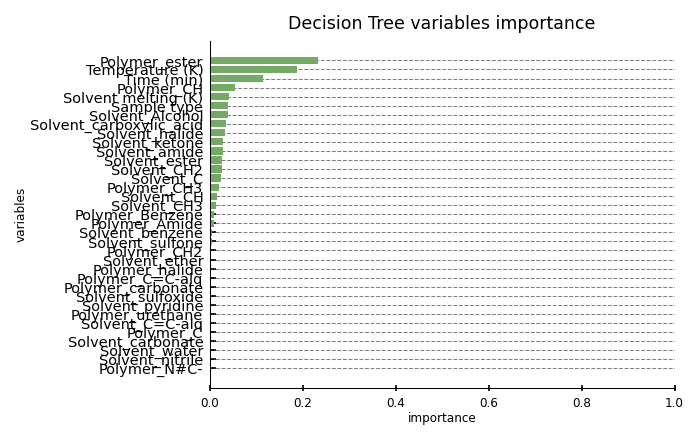

In [ ]:
from numpy import argsort
from matplotlib.pyplot import figure, gca, grid, savefig
from library.dslabs_functions import plot_horizontal_bar_chart

importances = best_model.feature_importances_
indices: list[int] = argsort(importances)[::-1]
elems: list[str] = []
imp_values: list[float] = []

for f in range(len(vars)):
    elems += [vars[indices[f]]]
    imp_values += [importances[indices[f]]]
    print(f"{f+1}. {elems[f]} ({importances[indices[f]]})")

figure()
plot_horizontal_bar_chart(
    elems,
    imp_values,
    title="Decision Tree variables importance",
    xlabel="importance",
    ylabel="variables",
    percentage=True,
)

ax = gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')

savefig(f"images/dt_{eval_metric}_vars_ranking.png")


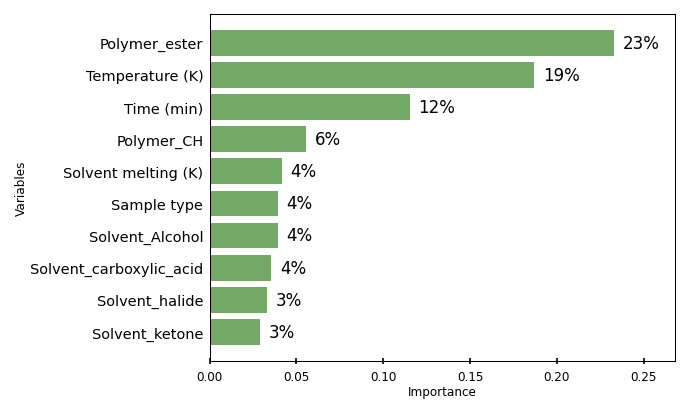

In [18]:
from numpy import argsort
from matplotlib.pyplot import figure, gca, savefig
import matplotlib.pyplot as plt


importances = best_model.feature_importances_
indices: list[int] = argsort(importances)[::-1]

top_n = 10
elems = [vars[i] for i in indices[:top_n]]
imp_values = [importances[i] for i in indices[:top_n]]


elems = elems[::-1]
imp_values = imp_values[::-1]


figure()
bars = plt.barh(range(len(elems)), imp_values, tick_label=elems)
plt.xlabel("Importance")
plt.ylabel("Variables")

plt.xlim(0, max(imp_values) * 1.15)


for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f"{width:.0%}", va='center', fontsize=8, color='black')


ax = gca()
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_color("black")


savefig("images/dt_vars_ranking.png", dpi=300, bbox_inches="tight")


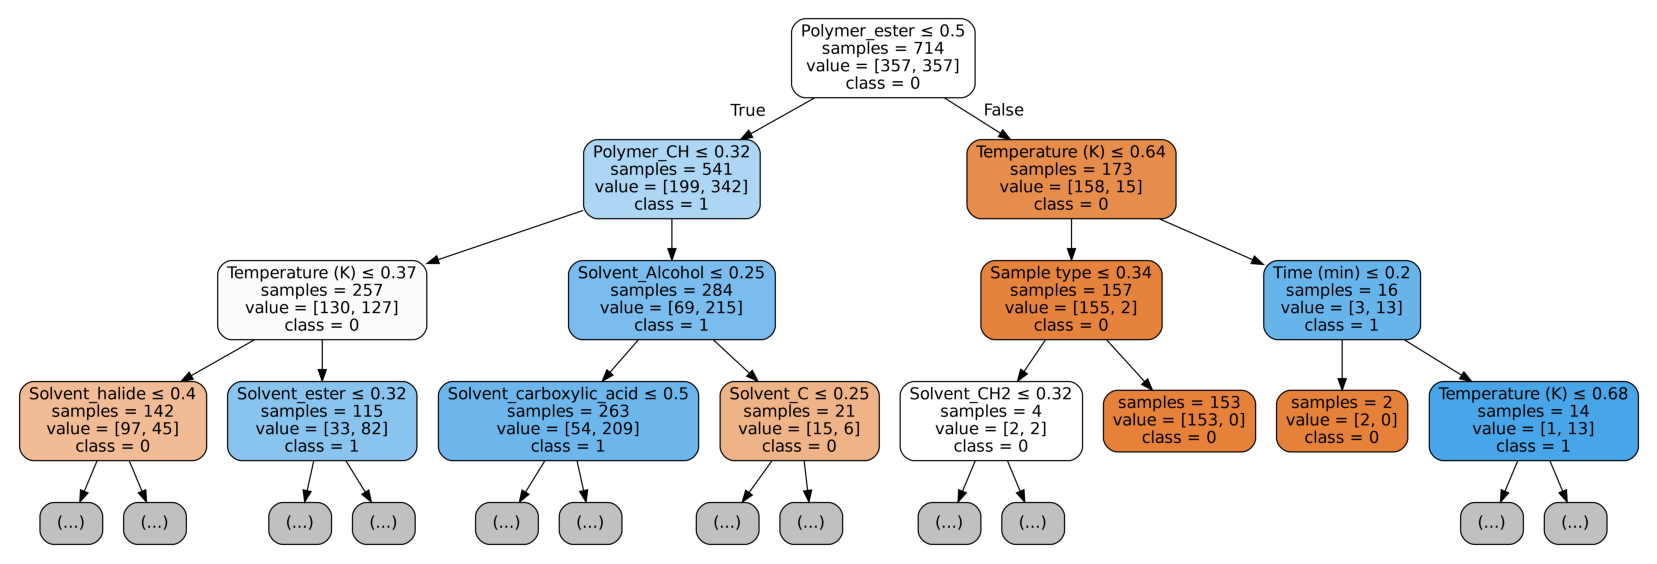

In [ ]:
from sklearn.tree import export_graphviz
from matplotlib.pyplot import imread, imshow, axis
from subprocess import call

tree_filename: str = f"images/{file_tag}_dt_{eval_metric}_best_tree"
max_depth2show = 3
st_labels: list[str] = [str(value) for value in labels]

dot_data: str = export_graphviz(
    best_model,
    out_file=tree_filename + ".dot",
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    special_characters=True,
    precision=2,
)

call(
    ["dot", "-Tpng", tree_filename + ".dot", "-o", tree_filename + ".png", "-Gdpi=600"]
)

figure(figsize=(14, 6))
imshow(imread(tree_filename + ".png"))
axis("off")
show()

`Logistic Regression`

Train#=714 Test#=269
Labels=[0, 1]
LR best for 500 iterations (penalty=l2)


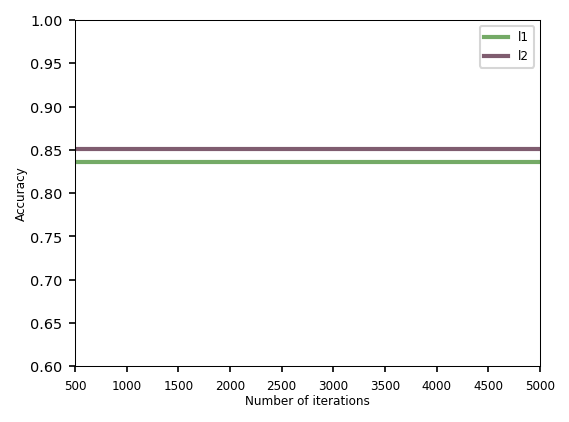

In [20]:
from numpy import array, ndarray
from matplotlib.pyplot import figure, savefig, show, gca
from sklearn.linear_model import LogisticRegression
from library.dslabs_functions import (
    CLASS_EVAL_METRICS,
    DELTA_IMPROVE,
    read_train_test_from_files,
)
from library.dslabs_functions import plot_evaluation_results, plot_multiline_chart


def logistic_regression_study(
    trnX: ndarray,
    trnY: array,
    tstX: ndarray,
    tstY: array,
    nr_max_iterations: int = 2500,
    lag: int = 500,
    metric: str = "Accuracy",
) -> tuple[LogisticRegression | None, dict]:
    nr_iterations: list[int] = [lag] + [
        i for i in range(2 * lag, nr_max_iterations + 1, lag)
    ]

    penalty_types: list[str] = ["l1", "l2"]

    best_model = None
    best_params: dict = {"name": "LR", "metric": metric, "params": ()}
    best_performance: float = 0.0

    values: dict = {}
    for type in penalty_types:
        warm_start = False
        y_tst_values: list[float] = []
        for j in range(len(nr_iterations)):
            clf = LogisticRegression(
                penalty=type,
                max_iter=lag,
                warm_start=warm_start,
                solver="liblinear",
                verbose=False,
                random_state=SEED,
            )
            clf.fit(trnX, trnY)
            prdY: array = clf.predict(tstX)
            eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
            y_tst_values.append(eval)
            warm_start = True
            if eval - best_performance > DELTA_IMPROVE:
                best_performance = eval
                best_params["params"] = (type, nr_iterations[j])
                best_model: LogisticRegression = clf
        values[type] = y_tst_values

    plot_multiline_chart(
        nr_iterations,
        values,
        title=f"",
        xlabel="Number of iterations",
        ylabel=metric,
        percentage=True,
    )

    
    ax = gca()
    ax.set_facecolor("white")         
    ax.set_ylim(bottom=0.60, top=1.0)  
    ax.grid(False)                    
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)      
        spine.set_color("black")

   
    ax.tick_params(direction="out")

    print(
        f'LR best for {best_params["params"][1]} iterations (penalty={best_params["params"][0]})'
    )

    return best_model, best_params



trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

figure()
best_model, params = logistic_regression_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_iterations=5000,
    lag=500,
    metric=eval_metric,
)
savefig(f"images/lr_study.png", dpi=300, bbox_inches="tight")
show()


<Figure size 600x450 with 0 Axes>

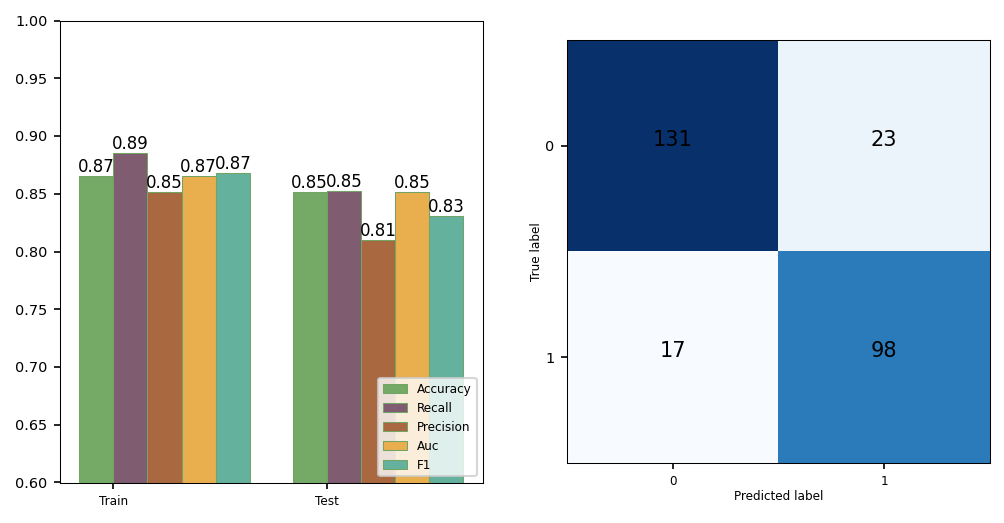

In [21]:
from numpy import array
from matplotlib.pyplot import figure, show, gca, savefig

prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)

figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)

fig = gca().figure


try:
    if fig._suptitle is not None:
        fig._suptitle.set_text("")
except Exception:
    pass

for i, ax in enumerate(fig.axes):
    ax.set_title("")
    ax.grid(False)
    ax.set_facecolor("white")

    
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)
        spine.set_color("black")

    
    ax.tick_params(direction="out")

    for text in ax.texts:
        text.set_color("black")

    
    if i == 0:
        ax.set_ylim(bottom=0.6)

        
        leg = ax.get_legend()
        if leg:
            leg.set_bbox_to_anchor((1, 0))  
            leg.set_loc("lower right")      

    
    if ax.get_xlabel() == "Predicted label" or ax.get_ylabel() == "True label":
        for im in ax.images:
            im.set_cmap("Blues")


savefig("images/evaluation_results_lr.png", dpi=300, bbox_inches="tight")

show()


In [22]:
def make_eval_title(params: dict) -> str:
    
    name = params.get("name", "MODEL")
    metric = params.get("metric", "metric")
    score = params.get(metric)  
    params_tuple = params.get("params", ())

    parts = [f"Best model: {name}"]
    if params_tuple:
        parts.append(f"params={params_tuple}")
    if score is not None:
        parts.append(f"{metric}={score:.4f}")
    return " | ".join(parts)


title = make_eval_title(params)
print(title) 


Best model: LR | params=('l2', 500)


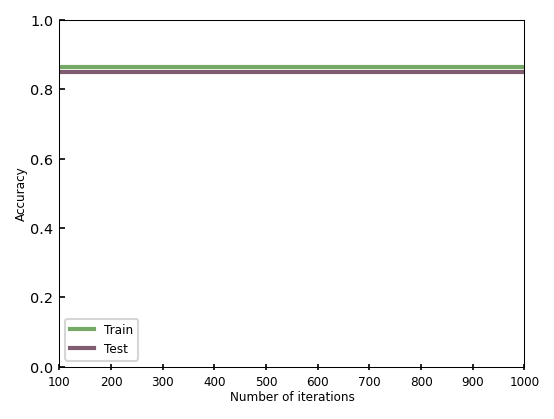

In [ ]:
import os
from matplotlib.pyplot import figure, gca, savefig, show, close
from numpy import array
from sklearn.linear_model import LogisticRegression

os.makedirs("images", exist_ok=True)

type: str = params["params"][0]
nr_iterations: list[int] = [i for i in range(100, 1001, 100)]

y_tst_values: list[float] = []
y_trn_values: list[float] = []
acc_metric = "Accuracy"

warm_start = False
for n in nr_iterations:
    clf = LogisticRegression(
        warm_start=warm_start,
        penalty=type,
        max_iter=n,
        solver="liblinear",
        verbose=False,
        random_state=SEED
    )
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))
    warm_start = True

figure()
plot_multiline_chart(
    nr_iterations,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"",
    xlabel="Number of iterations",
    ylabel=str(eval_metric),
    percentage=True,
)

ax = gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)

ax.grid(False)

savefig(f"images/{file_tag}_lr_{eval_metric}_overfitting.png", dpi=300, bbox_inches="tight")
show()
close()


`MLPs`

MLP best for 500 iterations (lr_type=adaptive and lr=0.5)


<Figure size 600x450 with 0 Axes>

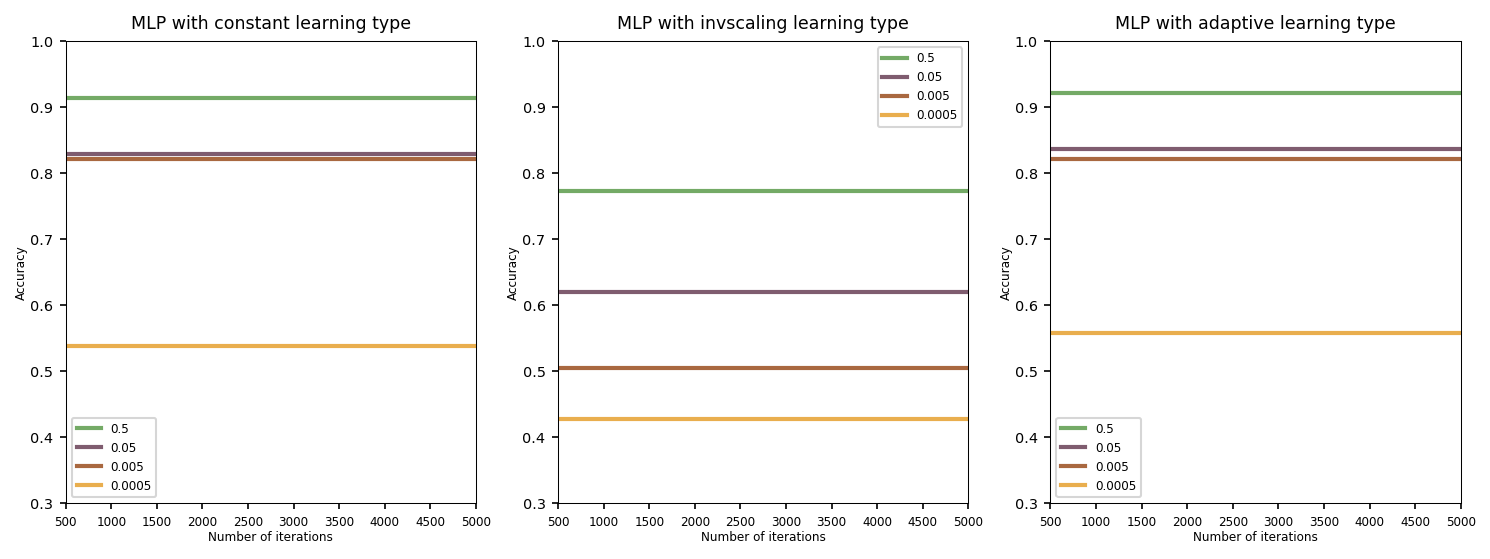

In [24]:
from matplotlib.pyplot import figure, subplots, show, savefig

LAG: int = 500
NR_MAX_ITER: int = 5000

def mlp_study(
    trnX: ndarray,
    trnY: array,
    tstX: ndarray,
    tstY: array,
    nr_max_iterations: int = 2500,
    lag: int = 500,
    metric: str = "Accuracy",
) -> tuple[MLPClassifier | None, dict]:
    nr_iterations: list[int] = [lag] + [i for i in range(2 * lag, nr_max_iterations + 1, lag)]

    lr_types: list[Literal["constant", "invscaling", "adaptive"]] = ["constant", "invscaling", "adaptive"]
    learning_rates: list[float] = [0.5, 0.05, 0.005, 0.0005]

    best_model: MLPClassifier | None = None
    best_params: dict = {"name": "MLP", "metric": metric, "params": ()}
    best_performance: float = 0.0

    _, axs = subplots(1, len(lr_types), figsize=(len(lr_types) * HEIGHT, HEIGHT), squeeze=False)

    for i, type in enumerate(lr_types):
        values: dict = {}
        for lr in learning_rates:
            warm_start = False
            y_tst_values: list[float] = []
            for n in nr_iterations:
                clf = MLPClassifier(
                    learning_rate=type,
                    learning_rate_init=lr,
                    max_iter=lag,
                    warm_start=warm_start,
                    activation="logistic",
                    solver="sgd",
                    verbose=False,
                    random_state=SEED,
                )
                clf.fit(trnX, trnY)
                prdY = clf.predict(tstX)
                eval = CLASS_EVAL_METRICS[metric](tstY, prdY)
                y_tst_values.append(eval)
                warm_start = True
                if eval - best_performance > DELTA_IMPROVE:
                    best_performance = eval
                    best_params["params"] = (type, lr, n)
                    best_model = clf
            values[lr] = y_tst_values

        plot_multiline_chart(
            nr_iterations, values, ax=axs[0, i],
            title=f"MLP with {type} learning type",
            xlabel="Number of iterations", ylabel=metric,
            percentage=True,
        )

    
    for ax_row in axs:
        for ax in ax_row:
            ax.grid(False)                 
            ax.set_facecolor("white")
            ax.set_ylim(bottom=0.3, top=1.0)

            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(0.5)   
                spine.set_color("black")

            
            ax.tick_params(direction="out")

    print(
        f'MLP best for {best_params["params"][2]} iterations '
        f"(lr_type={best_params['params'][0]} and lr={best_params['params'][1]})"
    )

    return best_model, best_params



figure()
best_model, params = mlp_study(
    trnX, trnY, tstX, tstY,
    nr_max_iterations=NR_MAX_ITER, lag=LAG, metric=eval_metric,
)


savefig(f"images/mlp_study_metrics.png", dpi=300, bbox_inches="tight")
show()


<Figure size 600x450 with 0 Axes>

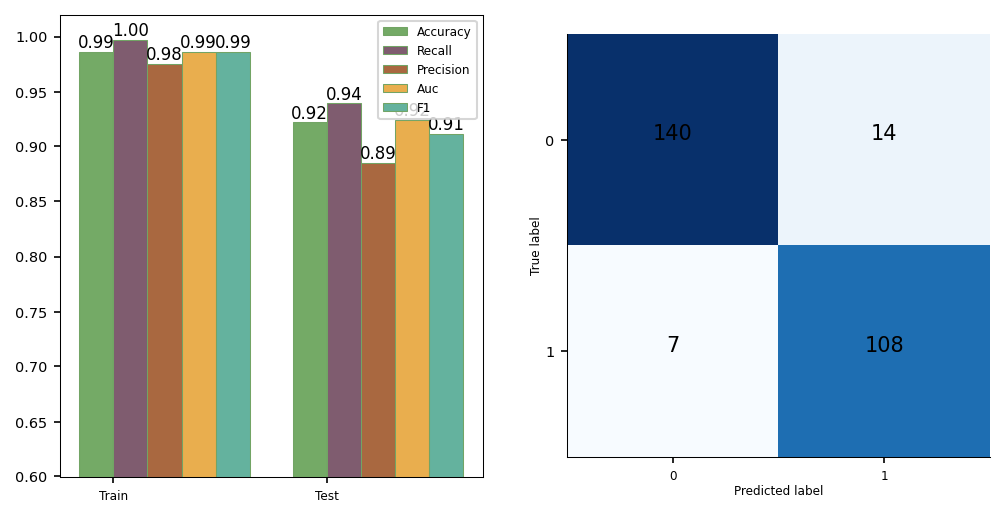

In [25]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
import matplotlib.image as mimage
from numpy import array

prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)


figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)


fig = plt.gcf()

for i, ax in enumerate(fig.axes):
    
    ax.grid(False)
        
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    for text in ax.texts:
        text.set_color("black")
 
    ax.set_title("")

    ax.tick_params(direction="out")

    if i == 0:
        
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(0.5)
        
        ax.set_ylim(0.6, 1.02)


fig.suptitle("")

for im in fig.findobj(match=mimage.AxesImage):
    im.set_cmap("Blues")

plt.savefig("images/mlp_study.png", dpi=300, bbox_inches="tight")

show()


In [26]:
def make_eval_title(params: dict) -> str:
    
    name = params.get("name", "MODEL")
    metric = params.get("metric", "metric")
    score = params.get(metric)  
    params_tuple = params.get("params", ())

    parts = [f"Best model: {name}"]
    if params_tuple:
        parts.append(f"params={params_tuple}")
    if score is not None:
        parts.append(f"{metric}={score:.4f}")
    return " | ".join(parts)


title = make_eval_title(params)
print(title)  


Best model: MLP | params=('adaptive', 0.5, 500)


In [27]:
print("len(nr_iterations):", len(nr_iterations))
print("len(y_trn_values):", len(y_trn_values))
print("len(y_tst_values):", len(y_tst_values))


len(nr_iterations): 10
len(y_trn_values): 10
len(y_tst_values): 10


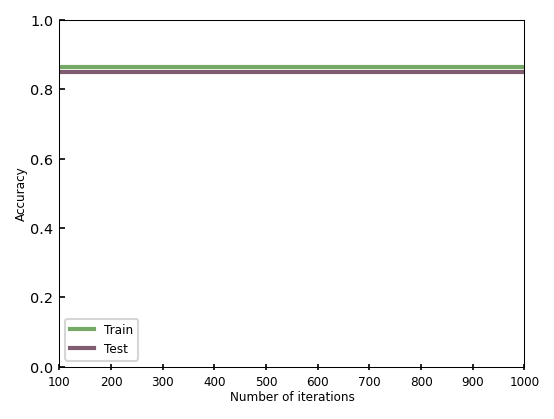

In [28]:
from matplotlib.pyplot import figure, gca, show, close

min_len = min(len(nr_iterations), len(y_trn_values), len(y_tst_values))
nr_iterations = nr_iterations[:min_len]
y_trn_values = y_trn_values[:min_len]
y_tst_values = y_tst_values[:min_len]

figure()

plot_multiline_chart(
    nr_iterations,
    {"Train": y_trn_values, "Test": y_tst_values},
    title="",
    xlabel="Number of iterations",
    ylabel=str(eval_metric),
    percentage=True,
)

ax = gca()

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)

ax.grid(False)

show()
close()


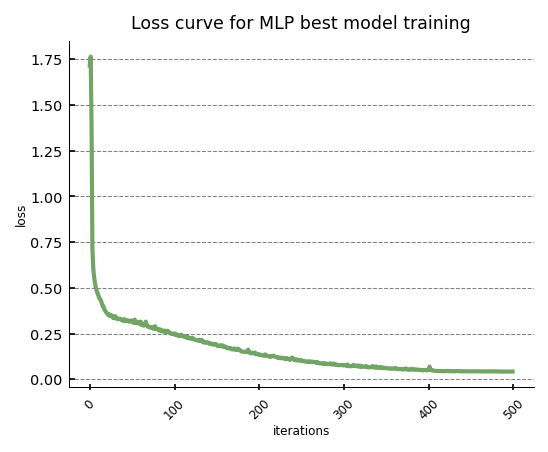

In [29]:
from matplotlib.pyplot import figure, gca, show
from numpy import arange

figure()
plot_line_chart(
    arange(len(best_model.loss_curve_)),
    best_model.loss_curve_,
    title="Loss curve for MLP best model training",
    xlabel="iterations",
    ylabel="loss",
    percentage=False,
)

ax = gca()

for spine in ax.spines.values():
    spine.set_linewidth(0.5)

ax.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')

ax.grid(False, axis='x')

show()



`Support Vector Machines`

Train#=714 Test#=269
Labels=[0, 1]
SVM best for poly_4 and n=250


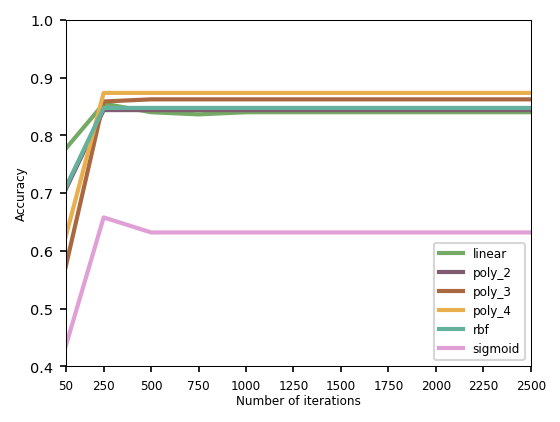

In [30]:
from numpy import array, ndarray
from matplotlib.pyplot import figure, gca, show, savefig
from sklearn.svm import SVC
import numpy as np
from library.dslabs_functions import (
    CLASS_EVAL_METRICS, DELTA_IMPROVE,
    plot_multiline_chart, read_train_test_from_files
)

def svm_study(
    trnX: ndarray,
    trnY: array,
    tstX: ndarray,
    tstY: array,
    nr_max_iterations: int = 2500,
    lag: int = 500,
    metric: str = "Accuracy",
) -> tuple[SVC | None, dict]:

    nr_iterations: list[int] = list(range(0, nr_max_iterations + 1, lag))
    if nr_iterations[0] == 0:  
        nr_iterations[0] = 50

    kernel_types: list[str] = ["linear", "poly", "rbf", "sigmoid"]
    poly_degrees: list[int] = [2, 3, 4]

    best_model = None
    best_params: dict = {"name": "SVM", "metric": metric, "params": ()}
    best_performance: float = 0.0

    values: dict = {}
    for kernel in kernel_types:
        degrees = poly_degrees if kernel == "poly" else [0]
        for d in degrees:
            kernel_name = f"poly_{d}" if kernel == "poly" else kernel
            y_tst_values: list[float] = []
            for n in nr_iterations:
                clf = SVC(kernel=kernel, max_iter=n, degree=d, verbose=False, random_state=SEED)
                clf.fit(trnX, trnY)
                prdY: array = clf.predict(tstX)
                eval_: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
                y_tst_values.append(eval_)

                
                if eval_ - best_performance > DELTA_IMPROVE:
                    best_performance = eval_
                    best_params["params"] = (kernel, n, d)
                    best_model = clf

            values[kernel_name] = y_tst_values

    figure()
    plot_multiline_chart(
        nr_iterations,
        values,
        title="",
        xlabel="Number of iterations",
        ylabel=metric,
        percentage=True,
    )

    ax = gca()
    ax.set_facecolor("white")
    ax.grid(False)
    ax.set_ylim(bottom=0.4, top=1.0)

    ax.set_xticks(nr_iterations)
    ax.set_xticklabels([str(x) for x in nr_iterations], rotation=0)
    ax.margins(x=0.02)

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)
        spine.set_color("black")

    ax.tick_params(direction="out")

    best_kernel = best_params["params"][0]
    kernel_name = f'poly_{best_params["params"][2]}' if best_kernel == "poly" else best_kernel
    print(f'SVM best for {kernel_name} and n={best_params["params"][1]}')

    return best_model, best_params

trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

best_model, params = svm_study(
    trnX, trnY, tstX, tstY,
    nr_max_iterations=2500,
    lag=250,
    metric=eval_metric,
)

savefig("images/svm_study.png", dpi=300, bbox_inches="tight")

show()


<Figure size 600x450 with 0 Axes>

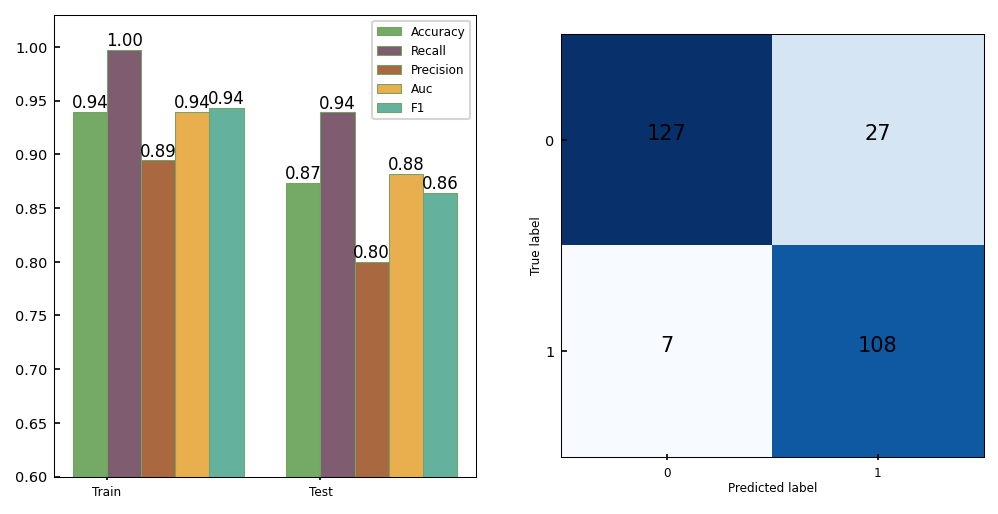

In [31]:
from matplotlib.pyplot import figure, show, savefig
from numpy import array
from library.dslabs_functions import plot_evaluation_results
import matplotlib.pyplot as plt

prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)

figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)

fig = plt.gcf()

try:
    if fig._suptitle is not None:
        fig._suptitle.set_text("")
except Exception:
    pass

for i, ax in enumerate(fig.axes):
    ax.set_title("")
    ax.grid(False)
    ax.set_facecolor("white")

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)
        spine.set_color("black")

    for text in ax.texts:
        text.set_color("black")

    if i == 0:
        ax.set_ylim(bottom=0.6, top=1.03)

    if ax.images:
        for im in ax.images:
            im.set_cmap("Blues")

savefig("images/evaluation_results_svm.png", dpi=300, bbox_inches="tight")
show()


In [32]:
def make_eval_title(params: dict) -> str:

    name = params.get("name", "MODEL")
    metric = params.get("metric", "metric")
    score = params.get(metric)
    params_tuple = params.get("params", ())

    parts = [f"Best model: {name}"]
    if params_tuple:
        parts.append(f"params={params_tuple}")
    if score is not None:
        parts.append(f"{metric}={score:.4f}")
    return " | ".join(parts)

title = make_eval_title(params)
print(title)  


Best model: SVM | params=('poly', 250, 4)


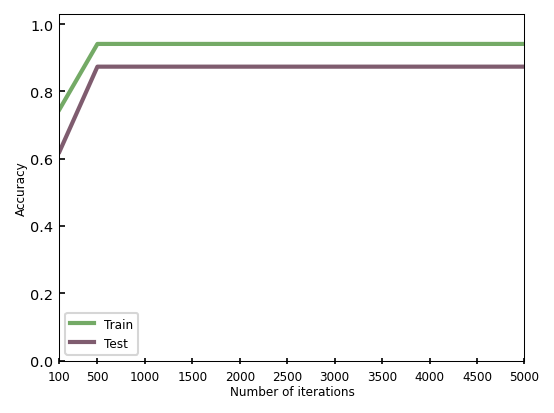

In [33]:
from numpy import array
from matplotlib.pyplot import figure, gca, show, close
from library.dslabs_functions import plot_multiline_chart

kernel: str = params["params"][0]
degree: int = params["params"][2]
kernel_name: str = f'poly (d={degree})' if kernel == "poly" else kernel
nr_iterations: list[int] = [100] + [i for i in range(500, 5001, 500)]

y_tst_values: list[float] = []
y_trn_values: list[float] = []
acc_metric: str = "Accuracy"

for n in nr_iterations:
    clf = SVC(kernel=kernel, max_iter=n, degree=degree, verbose=False, random_state=SEED)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    nr_iterations,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"",
    xlabel="Number of iterations",
    ylabel=str(eval_metric),
    percentage=True,
)

ax = gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)

ax.grid(False)
ax.set_ylim(0, 1.03)

show()
close()


`Random Forests`

RF best for 500 trees (d=15 and f=0.7)


<Figure size 600x450 with 0 Axes>

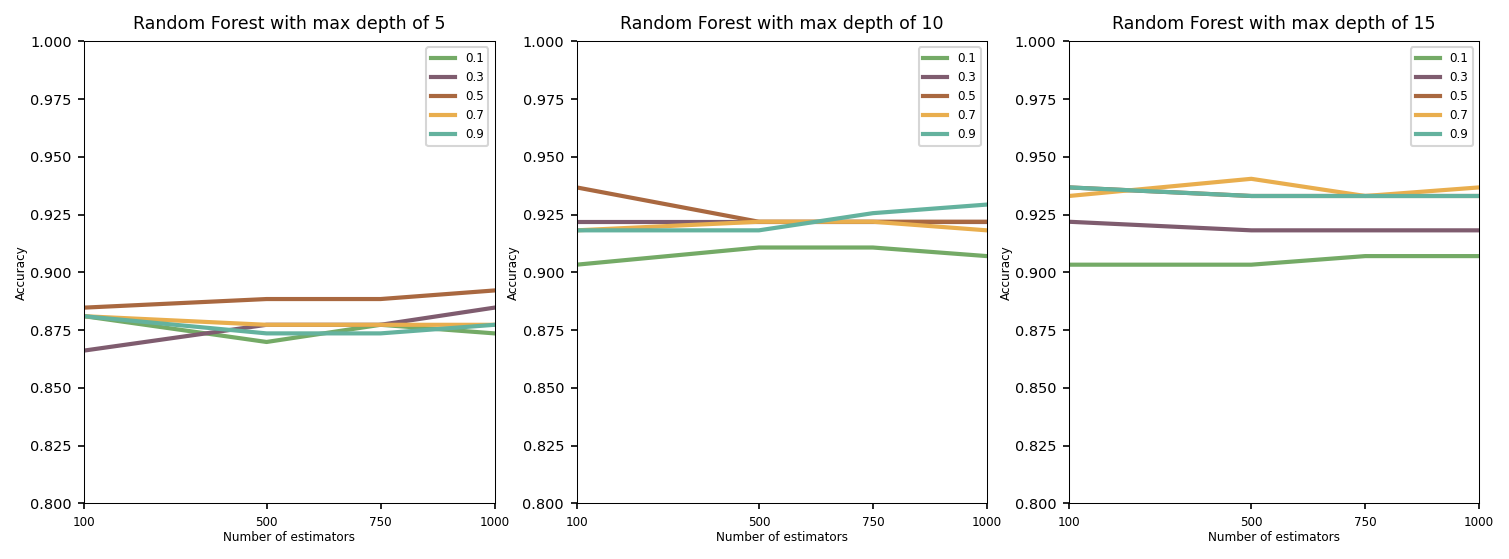

In [40]:
from numpy import array, ndarray
from matplotlib.pyplot import figure, subplots, show
from sklearn.ensemble import RandomForestClassifier
from library.dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_multiline_chart

def random_forests_study(
    trnX: ndarray,
    trnY: array,
    tstX: ndarray,
    tstY: array,
    nr_max_trees: int = 2500,
    lag: int = 500,
    metric: str = "Accuracy",
) -> tuple[RandomForestClassifier | None, dict]:
    n_estimators: list[int] = [100] + [i for i in range(500, nr_max_trees + 1, lag)]
    max_depths: list[int] = [5, 10, 15]
    max_features: list[float] = [0.1, 0.3, 0.5, 0.7, 0.9]

    best_model: RandomForestClassifier | None = None
    best_params: dict = {"name": "RF", "metric": metric, "params": ()}
    best_performance: float = 0.0

    cols: int = len(max_depths)
    _, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    for i in range(len(max_depths)):
        d: int = max_depths[i]
        values = {}
        for f in max_features:
            y_tst_values: list[float] = []
            for n in n_estimators:
                clf = RandomForestClassifier(
                    n_estimators=n,
                    max_depth=d,
                    max_features=f,
                    bootstrap=True,
                    oob_score=True,
                    n_jobs=-1,
                    random_state=SEED
                )
                clf.fit(trnX, trnY)
                prdY: array = clf.predict(tstX)
                eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
                y_tst_values.append(eval)
                if eval - best_performance > DELTA_IMPROVE:
                    best_performance = eval
                    best_params["params"] = (d, f, n)
                    best_model = clf
            values[f] = y_tst_values

        plot_multiline_chart(
            n_estimators,
            values,
            ax=axs[0, i],
            title=f"Random Forest with max depth of {d}",
            xlabel="Number of estimators",
            ylabel=metric,
            percentage=True,
        )

    for ax_row in axs:
        for ax in ax_row:
            ax.set_facecolor("white")        
            ax.set_ylim(bottom=0.8, top=1.0) 
            ax.grid(False)                   

            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(0.5)
                spine.set_color("black")
         
            ax.tick_params(direction="out")

    print(
        f'RF best for {best_params["params"][2]} trees (d={best_params["params"][0]} and f={best_params["params"][1]})'
    )
    return best_model, best_params

figure()
best_model, params = random_forests_study(
    trnX, trnY, tstX, tstY,
    nr_max_trees=1000,
    lag=250,
    metric=eval_metric,
)
savefig("images/random_forests_study.png", dpi=300, bbox_inches="tight")
show()


<Figure size 600x450 with 0 Axes>

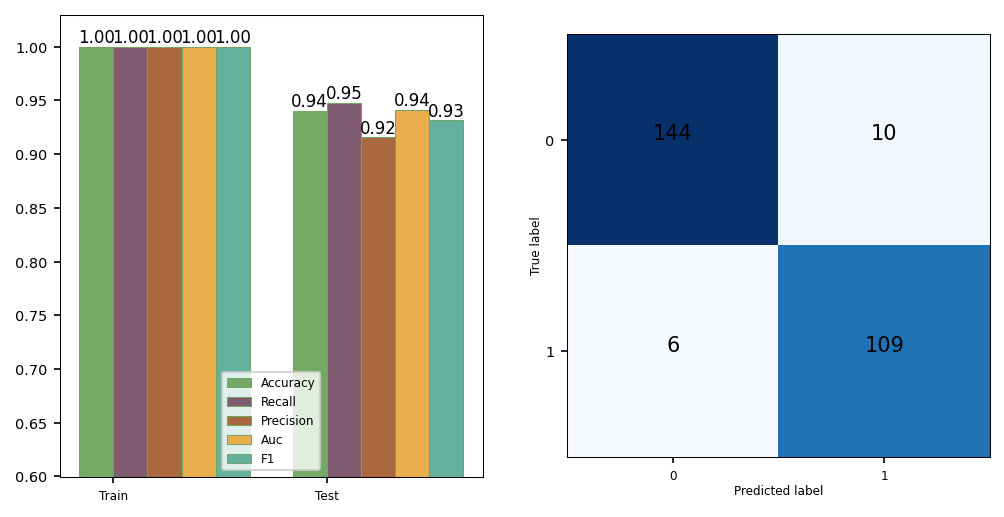

In [41]:
from matplotlib.pyplot import figure, gca, show, savefig
from library.dslabs_functions import plot_evaluation_results


prd_trn = best_model.predict(trnX)
prd_tst = best_model.predict(tstX)

figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)

fig = gca().figure

try:
    if fig._suptitle is not None:
        fig._suptitle.set_text("")
except Exception:
    pass

for i, ax in enumerate(fig.axes):
    ax.set_title("") 

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
        spine.set_color("black")
        spine.set_visible(True)

    ax.grid(False)

    ax.tick_params(direction="out")

    for text in ax.texts:
        text.set_color("black")

    if i == 0:
        ax.set_ylim(0.6, 1.03)   

    if ax.images:
        for im in ax.images:
            im.set_cmap("Blues")

savefig("images/evaluation_results_rf.png", dpi=300, bbox_inches="tight")

show()


In [42]:
def make_eval_title(params: dict) -> str:

    name = params.get("name", "MODEL")
    metric = params.get("metric", "metric")
    score = params.get(metric)  
    params_tuple = params.get("params", ())

    parts = [f"Best model: {name}"]
    if params_tuple:
        parts.append(f"params={params_tuple}")
    if score is not None:
        parts.append(f"{metric}={score:.4f}")
    return " | ".join(parts)


title = make_eval_title(params)
print(title)  


Best model: RF | params=(15, 0.7, 500)


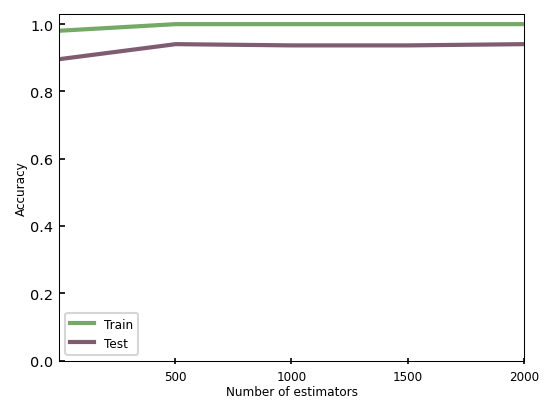

In [43]:
from numpy import array
from matplotlib.pyplot import figure, gca, show, close
from sklearn.ensemble import RandomForestClassifier
from library.dslabs_functions import plot_multiline_chart, CLASS_EVAL_METRICS

d_max: int = params["params"][0]
feat: float = params["params"][1]
nr_estimators: list[int] = [i for i in range(2, 2501, 500)]

y_tst_values: list[float] = []
y_trn_values: list[float] = []
acc_metric: str = "Accuracy"

for n in nr_estimators:
    clf = RandomForestClassifier(n_estimators=n, max_depth=d_max, max_features=feat, random_state=SEED)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    nr_estimators,
    {"Train": y_trn_values, "Test": y_tst_values},
    title="",
    xlabel="Number of estimators",
    ylabel=str(eval_metric),
    percentage=True,
)

ax = gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)

ax.grid(False)
ax.set_ylim(0, 1.03)

ax.set_xticks([500, 1000, 1500, 2000])
ax.set_xticklabels(["500", "1000", "1500", "2000"])

show()
close()


Gradiente Boosting

GB best for 100 trees (d=7, lr=0.2)


<Figure size 600x450 with 0 Axes>

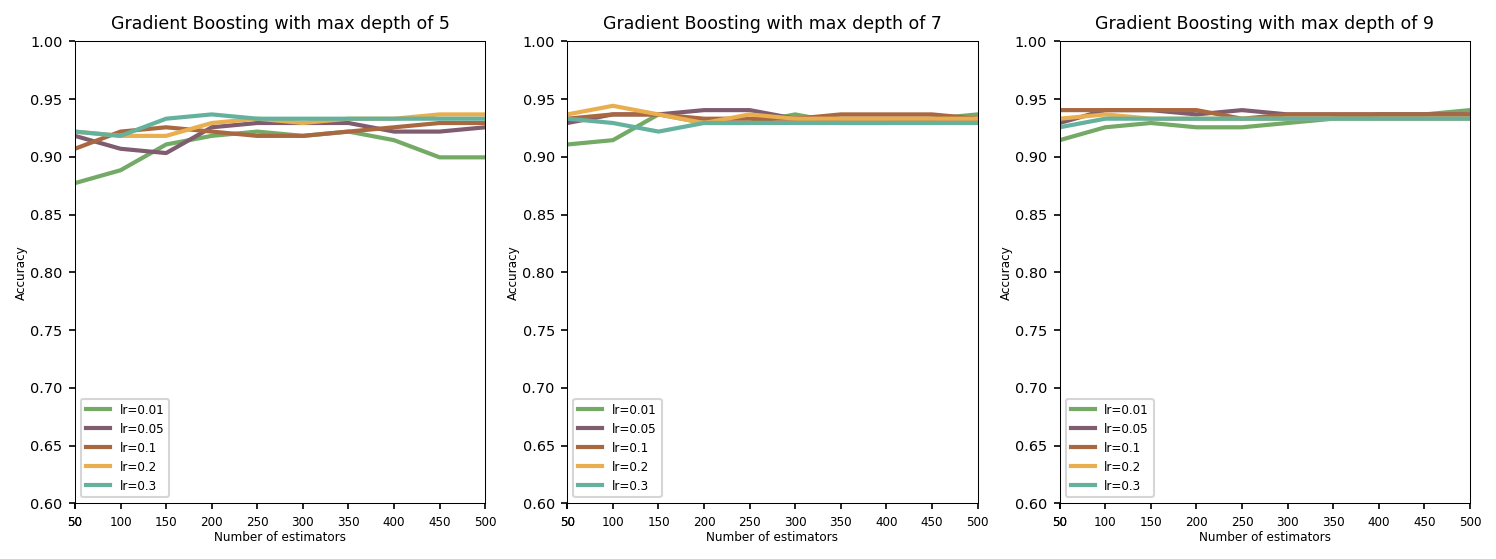

In [44]:
from numpy import array, ndarray
from matplotlib.pyplot import figure, subplots, show, savefig
from sklearn.ensemble import GradientBoostingClassifier
from library.dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_multiline_chart

def gradient_boosting_study(
    trnX: ndarray,
    trnY: array,
    tstX: ndarray,
    tstY: array,
    nr_max_trees: int = 500,
    lag: int = 50,
    metric: str = "Accuracy",
) -> tuple[GradientBoostingClassifier | None, dict]:
    n_estimators: list[int] = [50] + [i for i in range(50, nr_max_trees + 1, lag)]
    max_depths: list[int] = [5, 7, 9]
    learning_rates: list[float] = [0.01, 0.05, 0.1, 0.2, 0.3]

    best_model: GradientBoostingClassifier | None = None
    best_params: dict = {"name": "GB", "metric": metric, "params": ()}
    best_performance: float = 0.0

    values: dict = {}
    cols: int = len(max_depths)
    _, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)

    for i, d in enumerate(max_depths):
        values = {}
        for lr in learning_rates:
            y_tst_values: list[float] = []
            for n in n_estimators:
                clf = GradientBoostingClassifier(
                    n_estimators=n,
                    max_depth=d,
                    learning_rate=lr,
                    random_state=SEED
                )
                clf.fit(trnX, trnY)
                prdY: array = clf.predict(tstX)
                eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
                y_tst_values.append(eval)
                if eval - best_performance > DELTA_IMPROVE:
                    best_performance = eval
                    best_params["params"] = (d, lr, n)
                    best_model = clf
            values[f"lr={lr}"] = y_tst_values

        plot_multiline_chart(
            n_estimators,
            values,
            ax=axs[0, i],
            title=f"Gradient Boosting with max depth of {d}",
            xlabel="Number of estimators",
            ylabel=metric,
            percentage=True,
        )

    for ax_row in axs:
        for ax in ax_row:
            ax.set_facecolor("white")        
            ax.set_ylim(bottom=0.6, top=1.0)  
            ax.tick_params(direction="out")   

          
            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(0.5)
                spine.set_color("black")

            ax.grid(False)

    print(
        f'GB best for {best_params["params"][2]} trees '
        f'(d={best_params["params"][0]}, lr={best_params["params"][1]})'
    )

    return best_model, best_params

figure()
best_model, params = gradient_boosting_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_trees=500,
    lag=50,
    metric=eval_metric,
)

savefig("images/gradient_boosting_study.png", dpi=300, bbox_inches="tight")

show()


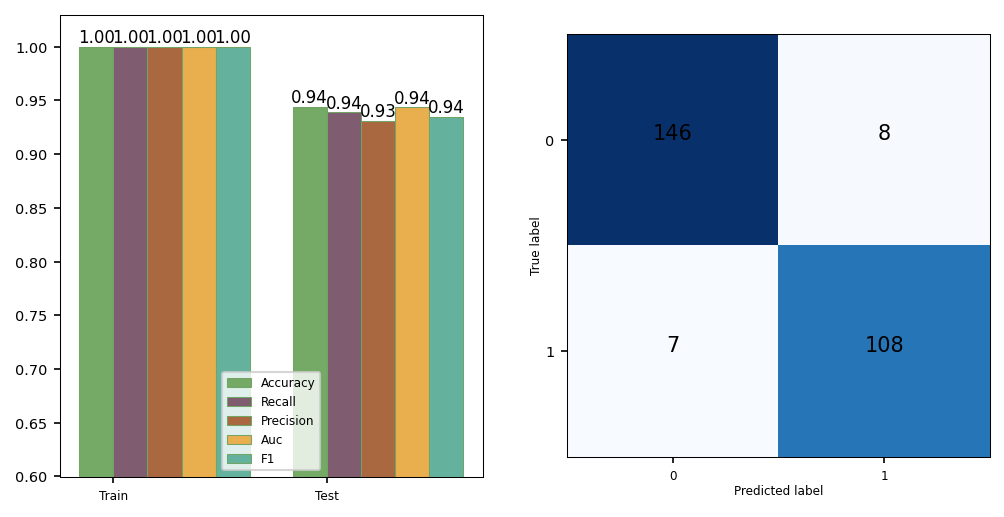

In [45]:
from numpy import array
from matplotlib.pyplot import gcf, show, savefig
from library.dslabs_functions import plot_evaluation_results

prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)

plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)

fig = gcf()
axs = fig.axes
left_ax = axs[0]   
right_ax = axs[1] 

try:
    if fig._suptitle is not None:
        fig._suptitle.set_text("")
except Exception:
    pass

left_ax.set_title("")
right_ax.set_title("")

for spine in left_ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)   
    spine.set_color("black")
left_ax.grid(False)
left_ax.set_ylim(bottom=0.6, top=1.03)   
left_ax.tick_params(direction="out")  

right_ax.grid(False) 
for im in right_ax.images:
    im.set_cmap("Blues") 
right_ax.tick_params(direction="out") 

for spine in right_ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_color("black")

for text in right_ax.texts:
    text.set_color("black")

savefig("images/evaluation_results_custom_GB.png", dpi=300, bbox_inches="tight")

show()


In [46]:
def make_eval_title(params: dict) -> str:
 
    name = params.get("name", "MODEL")
    metric = params.get("metric", "metric")
    score = params.get(metric) 
    params_tuple = params.get("params", ())

    parts = [f"Best model: {name}"]
    if params_tuple:
        parts.append(f"params={params_tuple}")
    if score is not None:
        parts.append(f"{metric}={score:.4f}")
    return " | ".join(parts)

title = make_eval_title(params)
print(title) 


Best model: GB | params=(7, 0.2, 100)


1. Polymer_ester (0.22157600796616586)
2. Temperature (K) (0.18052525099860225)
3. Time (min) (0.10828449385804433)
4. Solvent melting (K) (0.07052642654776178)
5. Polymer_CH (0.047802618280691524)
6. Solvent_halide (0.039158801757794084)
7. Solvent_carboxylic_acid (0.03868018102077645)
8. Solvent_amide (0.0348685095829572)
9. Solvent_CH2 (0.033237346612497186)
10. Solvent_CH3 (0.03232449288677472)


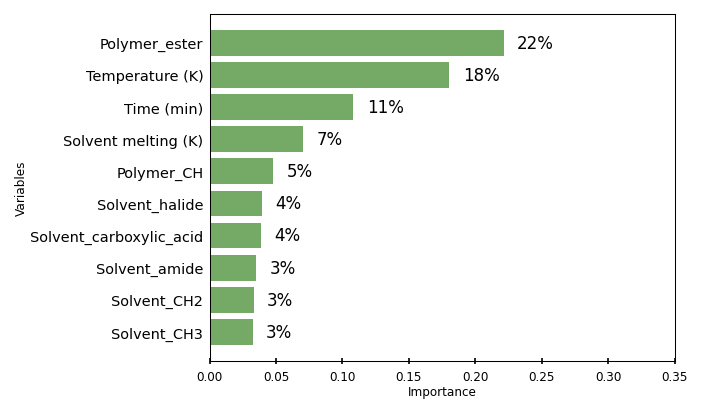

In [47]:
from numpy import std, argsort
from matplotlib.pyplot import figure, gca, show, savefig
from library.dslabs_functions import plot_horizontal_bar_chart

trees_importances: list[float] = []
for lst_trees in best_model.estimators_:
    for tree in lst_trees:
        trees_importances.append(tree.feature_importances_)

stdevs: list[float] = list(std(trees_importances, axis=0))
importances = best_model.feature_importances_
indices: list[int] = argsort(importances)[::-1]

top_n = 10
elems: list[str] = []
imp_values: list[float] = []

for f in range(top_n):
    idx = indices[f]
    elems.append(vars[idx])
    imp_values.append(importances[idx])
    print(f"{f+1}. {vars[idx]} ({importances[idx]})")

figure()
plot_horizontal_bar_chart(
    elems,
    imp_values,
    title="",  
    xlabel="Importance",
    ylabel="Variables",
    percentage=True,
)

ax = gca()
ax.set_facecolor("white")
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_color("black")
    spine.set_visible(True)

ax.grid(False)

ax.set_xlim(0, 0.35)

for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + 0.01, y, f"{width:.0%}", va='center', fontsize=8, color='black')

savefig("images/gb_variable_importances.png", dpi=300, bbox_inches="tight")
show()


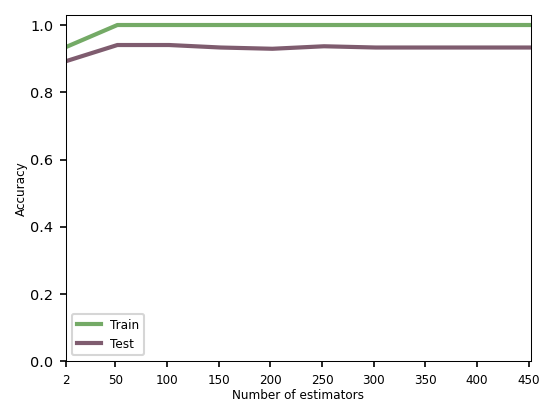

In [52]:
from numpy import array
from matplotlib.pyplot import figure, gca, savefig, show, close
from sklearn.ensemble import GradientBoostingClassifier
from library.dslabs_functions import plot_multiline_chart, CLASS_EVAL_METRICS

d_max: int = params["params"][0]
lr: float = params["params"][1]
nr_estimators: list[int] = [i for i in range(2, 500, 50)]

y_tst_values: list[float] = []
y_trn_values: list[float] = []
acc_metric: str = "Accuracy"

for n in nr_estimators:
    clf = GradientBoostingClassifier(n_estimators=n, max_depth=d_max, learning_rate=lr, random_state=SEED)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    nr_estimators,
    {"Train": y_trn_values, "Test": y_tst_values},
    title="",
    xlabel="Number of estimators",
    ylabel=str(eval_metric),
    percentage=True,
)

ax = gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)

ax.grid(False)
ax.set_ylim(0, 1.03)

ax.set_xticks([2, 50, 100, 150, 200, 250, 300, 350, 400, 450])
ax.set_xticklabels(["2", "50", "100", "150", "200", "250", "300", "350", "400", "450"])
ax.tick_params(direction='out')

savefig(f"images/{file_tag}_gb_{eval_metric}_overfitting.png", dpi=300, bbox_inches="tight")
show()
close()
